# Question1: Automobile Dataset

# Steps undertaken in this algorithm

<ol>
    <li>imported libraries and dataset</li>
    <li>Dropped all the categorical features as I had witnessed the same rmse or maybe less without any categorical 
     features</li>
    <li>Find out correlation of each feature with respect to price column, and dropped features which are least related</li>
    <li> Calculated distance between x-train and x-test and sorted it in ascending order so that the closest neighbours can be easily found.</li>
     <li>Implemented Knn and calculated rmse for particular value of k and sorted distance</li>
     <li>For Q1(A) reported the error observed</li>
     <li> Splitted the training data into train and validation set</li>
    <li> Used holdout Cross-Validation and plotted RMSE for values of "k" within a range 1 to 50</li>
    <li> For Q1(B) Rreported the range of k where rmse is likely to be optimal
    
</ol>


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#Attaching column heads to all the columns as our dataset doesn't have any column head
col_heads=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
           'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
           'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 
           'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

filename='auto.csv'

df=pd.read_csv(filename,names=col_heads)


df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [5]:
#imputing missing values
miss_data_cols=[]

#replacing cylinders labels with its numeric equivalent as we'll be dealing with numbers and one-hot encoding will discard 
#necessary info
num_of_cylinders={'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}
for i in range(len(df['num-of-cylinders'])):
     
    df.at[i, 'num-of-cylinders']=num_of_cylinders[df.iloc[i]['num-of-cylinders']]

            
df=df.replace("?",np.nan)

#As we're predicting prices, there's no point in approximating the output label, so it's better to drop the rows as number of
#rows are also less
df=df.dropna(subset=['price']) #Dropped 2 rows having null values in num-of-doors column and empty price columns



#Used for one hot encoding
df.drop(['make', 'fuel-type', 'aspiration', 'num-of-doors','body-style', 'drive-wheels', 
                                 'engine-type','fuel-system','engine-location'], axis=1, inplace=True)
# df = pd.get_dummies(df, columns=['make', 'fuel-type', 'aspiration', 'num-of-doors','body-style', 'drive-wheels', 
#                                  'engine-type','fuel-system','engine-location'])
to_numeric_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price','engine-size']
df[to_numeric_cols] = df[to_numeric_cols].astype(float)

df=df.fillna(df.median())
df.dtypes
df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,88.6,168.8,64.1,48.8,2548,4,130.0,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,88.6,168.8,64.1,48.8,2548,4,130.0,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,94.5,171.2,65.5,52.4,2823,6,152.0,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,4,109.0,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,5,136.0,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,4,141.0,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,4,141.0,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,6,173.0,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,6,145.0,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [6]:
#Finding correlation of price with other features so that we get to know which features are least important
corre=df.corr()
corre['price']
#symboling, normalized losses, stroke, compression-ratio


symboling           -0.082391
normalized-losses    0.094366
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
num-of-cylinders     0.708645
engine-size          0.872335
bore                 0.543158
stroke               0.082209
compression-ratio    0.071107
horsepower           0.810500
peak-rpm            -0.102310
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
Name: price, dtype: float64

In [7]:
#Dropping features which have least correlation with the price
df.drop(['symboling','normalized-losses', 'compression-ratio', 'stroke'], axis=1,inplace=True)

In [8]:

# Standardized the columns
cols_to_norm = [ 'wheel-base', 'length', 'width','height',
                       'curb-weight', 'bore',
                      'horsepower', 'peak-rpm','engine-size', 'num-of-cylinders']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.mean() / x.std()))
df['price']

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 201, dtype: float64

In [9]:
#Train-test-split
train_split_percent = 0.8
# Splitting the dataset into train, validation and test datasets

#We'll be using holdout cross validation, and so it's required to seperate out a portion of data for validation set
# train_validation_split=1
size = df.shape[0]

train = df.iloc[:int(train_split_percent * size),:]
# train1=train
#size1=train.shape[0]
#valid=train.iloc[int(train_validation_split*size1):,:]
#train = df.iloc[:int(train_validation_split*size1),:]
test= df.iloc[int(train_split_percent * size):,:]

y_train=train['price'].to_numpy()
x_train=train.drop(['price'],axis=1).to_numpy()

# y_valid=valid['price'].to_numpy()
# x_valid=valid.drop(['price'],axis=1).to_numpy()


y_test=test['price'].to_numpy()
x_test=test.drop(['price'],axis=1).to_numpy()
        



In [10]:
#Changing the shape of the target varibale for easy computation/ numpy braodcasting 

y_train = y_train.reshape(len(y_train),1)
# y_valid=y_valid.reshape(len(y_valid),1)
y_test = y_test.reshape(len(y_test),1)
# y_valid_pred=np.zeros(y_valid.shape)
y_pred = np.zeros(y_test.shape)


In [11]:
# Calculating the distance matrix using numpy broadcasting technique 

distance = np.sqrt(((x_train[:, :, None] - x_test[:, :, None].T) ** 2).sum(1))
sorted_distance = np.argsort(distance, axis = 0)
def knn(x_train,x_test,y_train,y_test,sorted_distance,k):
    y_pred = np.zeros(y_test.shape)
    for row in range(len(x_test)):
        
        #Transforming the y_train values to adjust the scale. 
        y_pred[row] = y_train[sorted_distance[:,row][:k]].mean() 
    
    #RMSE formula Root(mean of squares of all the differences)
    RMSE = np.sqrt(np.mean((y_test - y_pred)**2))
    return RMSE





#RMSE Result of the test set Q1(A)
rmse_test=knn(x_train,x_test,y_train,y_test,sorted_distance,30)
rmse_test


1911.0971998256841

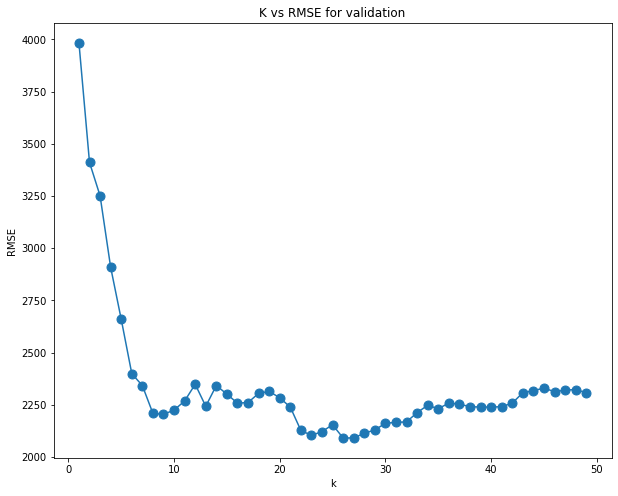

In [12]:
train_validation_split=0.8
size1=train.shape[0]

train= df.iloc[:int(train_validation_split*size1),:]
valid1= df.iloc[int(train_validation_split*size1):,:]
y_valid_train=train['price'].to_numpy()
x_valid_train=train.drop(['price'],axis=1).to_numpy()

y_valid_test=valid1['price'].to_numpy()

x_valid_test=valid1.drop(['price'],axis=1).to_numpy()

y_valid_train=y_valid_train.reshape(len(y_valid_train),1)
y_valid_test=y_valid_test.reshape(len(y_valid_test),1)
y_pred = np.zeros(y_valid_test.shape)

distance = np.sqrt(((x_valid_train[:, :, None] - x_valid_test[:, :, None].T) ** 2).sum(1))
sorted_distance = np.argsort(distance, axis = 0)
rmse_valid1=[]
for k in range(1,50):
    
    rmse_valid1.append(knn(x_valid_train,x_valid_test, y_valid_train,y_valid_test,sorted_distance,k))
    


    

plt.figure(figsize=(10,8))

plt.plot(range(1,50),rmse_valid1, marker='o', markersize=9)
plt.title("K vs RMSE for validation")
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()
#Q1(B) we can see from the validation set, that good value of k is withing 20-3o

# Question 2:Income dataset

# Steps undertaken in this algorithm
<ol>
  
  <li>Imported libraries</li>
  
  <li>Fetched the data</li>
  <li>Relabelled some similar type values with a common labels</li>
  <li>Dropped Capital gain and loss as they were mostly filled with 0's</li>
  <li>Label encoded some categorical values to be used in decision stumps</li>
  <li>Splitted data into train-validation-test</li>
  <li>Node() will help us to create a tree node, and all associated functionalities of it</li>
  <li>For Question 2(A):Trained out Decision tree model on training data and then tested on test data and reported the accuracy</li>
    <li>Used simple holdout-cross-validation to seperate out a validation set and run our model on validation set for different values of max-depth(hyperparameters) to get results</li>
      <li>For Question 2(B):Observed from the graph and reported the likely optimal value of "max_depth"</li>
   
</ol>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
col_heads=['age', 'workclass', 'fnlwgt', 'education', 'education-num','martial-status', 'occupation', 'relationship', 'race', 'sex',
          'capital-gain','capital-loss','hours-per-week','native-country','income']

df=pd.read_csv('adult.csv',names=col_heads)
df.head()

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
#Minimizing number of distinct values with simpler values
df['hours-per-week'] = df['hours-per-week'].astype(float)

df['education'].replace(' Preschool', 'dropout',inplace=True)
df['education'].replace(' 10th', 'dropout',inplace=True)
df['education'].replace(' 11th', 'dropout',inplace=True)
df['education'].replace(' 12th', 'dropout',inplace=True)
df['education'].replace(' 1st-4th', 'dropout',inplace=True)
df['education'].replace(' 5th-6th', 'dropout',inplace=True)
df['education'].replace(' 7th-8th', 'dropout',inplace=True)
df['education'].replace(' 9th', 'dropout',inplace=True)
df['education'].replace(' HS-Grad', 'HighGrad',inplace=True)
df['education'].replace(' HS-grad', 'HighGrad',inplace=True)
df['education'].replace(' Some-college', 'CommunityCollege',inplace=True)
df['education'].replace(' Assoc-acdm', 'CommunityCollege',inplace=True)
df['education'].replace(' Assoc-voc', 'CommunityCollege',inplace=True)
df['education'].replace(' Bachelors', 'Bachelors',inplace=True)
df['education'].replace(' Masters', 'Masters',inplace=True)
df['education'].replace(' Prof-school', 'Masters',inplace=True)
df['education'].replace(' Doctorate', 'Doctorate',inplace=True)

df['martial-status'].replace(' Never-married', 'NotMarried',inplace=True)
df['martial-status'].replace(' Married-AF-spouse', 'Married',inplace=True)
df['martial-status'].replace(' Married-civ-spouse', 'Married',inplace=True)
df['martial-status'].replace(' Married-spouse-absent', 'NotMarried',inplace=True)
df['martial-status'].replace(' Separated', 'Separated',inplace=True)
df['martial-status'].replace(' Divorced', 'Separated',inplace=True)
df['martial-status'].replace(' Widowed', 'Widowed',inplace=True)

df.replace(' ?',np.nan,inplace=True)


In [16]:
#Filling missing values with mode of data as it won't be sensible to fill using median for categorical features

#Replaced outcomes with <=50k to -1 and >50k to +1, this encoding will help us in calculations related to decision tree
df.fillna(df.mode().loc[0], inplace=True)
df['income'].replace(' <=50K',-1,inplace=True)
df['income'].replace(' >50K',1,inplace=True)
df.drop(['capital-gain','capital-loss'],axis=1,inplace=True)
df

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,NotMarried,Adm-clerical,Not-in-family,White,Male,40.0,United-States,-1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,13.0,United-States,-1
2,38,Private,215646,HighGrad,9,Separated,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States,-1
3,53,Private,234721,dropout,7,Married,Handlers-cleaners,Husband,Black,Male,40.0,United-States,-1
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,40.0,Cuba,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,CommunityCollege,12,Married,Tech-support,Wife,White,Female,38.0,United-States,-1
32557,40,Private,154374,HighGrad,9,Married,Machine-op-inspct,Husband,White,Male,40.0,United-States,1
32558,58,Private,151910,HighGrad,9,Widowed,Adm-clerical,Unmarried,White,Female,40.0,United-States,-1
32559,22,Private,201490,HighGrad,9,NotMarried,Adm-clerical,Own-child,White,Male,20.0,United-States,-1


In [17]:
#label encoding some categorical values to be used for creating decision stumps with binary outcome
country=set(df['native-country'].values)
sex= set(df['sex'].values)
relationship=set(df['relationship'].values)
education=set(df['education'].values)
martial_status=set(df['martial-status'].values)
workclass=set(df['workclass'].values)
race=set(df['race'].values)
occupation=set(df['occupation'].values)

val_lab=['native-country', 'sex', 'relationship', 'education', 'martial-status',
        'workclass', 'race','occupation']

counter=0
for labs in [country,sex,relationship,education,martial_status,workclass,race,occupation]:
    lab_enco={}
    for i in range(len(labs)):
        lab_enco[list(set(labs))[i]]=i
        
    
    print(lab_enco)
    for i in range(len(df[val_lab[counter]])):
     
        df.at[i,val_lab[counter] ]=lab_enco[df.iloc[i][val_lab[counter]]]
        
        
        
    counter+=1

{' Yugoslavia': 0, ' Greece': 1, ' Ecuador': 2, ' Cambodia': 3, ' El-Salvador': 4, ' Guatemala': 5, ' Portugal': 6, ' South': 7, ' Hong': 8, ' Mexico': 9, ' Canada': 10, ' Peru': 11, ' Honduras': 12, ' United-States': 13, ' Poland': 14, ' Hungary': 15, ' Philippines': 16, ' England': 17, ' Trinadad&Tobago': 18, ' Thailand': 19, ' Nicaragua': 20, ' Holand-Netherlands': 21, ' Jamaica': 22, ' France': 23, ' Dominican-Republic': 24, ' India': 25, ' Laos': 26, ' Haiti': 27, ' Germany': 28, ' Puerto-Rico': 29, ' Scotland': 30, ' China': 31, ' Ireland': 32, ' Columbia': 33, ' Cuba': 34, ' Iran': 35, ' Outlying-US(Guam-USVI-etc)': 36, ' Japan': 37, ' Italy': 38, ' Taiwan': 39, ' Vietnam': 40}
{' Male': 0, ' Female': 1}
{' Wife': 0, ' Own-child': 1, ' Other-relative': 2, ' Unmarried': 3, ' Husband': 4, ' Not-in-family': 5}
{'CommunityCollege': 0, 'Masters': 1, 'HighGrad': 2, 'Doctorate': 3, 'dropout': 4, 'Bachelors': 5}
{'Separated': 0, 'Married': 1, 'Widowed': 2, 'NotMarried': 3}
{' Self-emp-i

In [18]:
#Converted data to numeric type for operating ont them
to_numeric_cols = ['workclass', 'education', 'martial-status', 'occupation', 'relationship', 'race','sex', 'hours-per-week'
                   ,'native-country']
df[to_numeric_cols] = df[to_numeric_cols].astype(np.int64)

df.dtypes

age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
martial-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
hours-per-week    int64
native-country    int64
income            int64
dtype: object

In [19]:
#splitting dataset
#Train-validation-split
train_split_percent = 0.8
# Splitting the dataset into test and train datasets

train_validation_split=0.7
size = df.shape[0]

train = df.iloc[:int(train_split_percent * size),:]
size1=train.shape[0]
valid=train.iloc[int(train_validation_split*size1):,:]
train = df.iloc[:int(train_validation_split*size1),:]
test= df.iloc[int(train_split_percent * size):,:]

y_train=train['income'].to_numpy()
x_train=train.drop(['income'],axis=1).to_numpy()

y_valid=valid['income'].to_numpy()
x_valid=valid.drop(['income'],axis=1).to_numpy()


y_test=test['income'].to_numpy()
x_test=test.drop(['income'],axis=1).to_numpy()
        


# IG=Entropy(S) - |S1|/|S| * Entropy(S1) - |S2|/|S| * Entropy(S2)

# Where |S|= Number of elements in the current node, |S1|= Number of elements in left subtree, |S2|=Number of elements in right subtree

In [20]:
class Node:
    # A node stores its own depth (root = depth 0), its decision stump, its parent and child information
    # Leaf nodes also store a constant label that is assigned to every data point that reaches that leaf
    def __init__( self, depth = 0, stump = (0,0), parent = None ):
        self.depth = depth
        self.stump = stump
        self.parent = parent
        self.left = None
        self.right = None
        self.isLeaf = True
        self.label = 0
        
    def predict( self, data ):
      
        #When we're at the leaf we can just return the label or the prediction as determined in the train function
        if self.isLeaf:
            return self.label
       
        #Current node isn't a leaf then check whether selected_feature value> threshold or not
        else:
            if data[self.stump[0]] > self.stump[1]:
                return self.right.predict( data )
            else:
                return self.left.predict( data )
            
    # Calculate Entropy
    def H( self, nPos, nNeg ):
        nTot = nPos + nNeg
        # Find the proportion of the positives and negatives in that node
        pPos = nPos/nTot
        pNeg = nNeg/nTot
        if(pPos==0.0 and pNeg!=0.0):
            entropy=-pNeg*(np.log(pNeg)/np.log(2))
        elif(pNeg==0.0 and pPos!=0.0):
            entropy=-pPos*(np.log(pPos)/np.log(2))
            
        elif(pPos!=0.0 and pNeg!=0.0):
            entropy=-pNeg*(np.log(pNeg)/np.log(2))-pPos*(np.log(pPos)/np.log(2))
            
        else:
             entropy=0
            
        # The entropy is always a real number between 0 and 1
        # A perfectly pure node has gini index = 1
        # We want information gain to be more
      
        return entropy
            
    def decision_fn( self, X, y ):
        # Number of output labels or data points at this node
        n = y.size
        bestIG = float('-inf')
        bestFeat=0
        bestThresh=0
        # For each of the features in the data
        for i in range( X.shape[1] ):
            # Do not use the same feature as used by the parent node
            if self.parent is not None and i == self.parent.stump[0]:
                continue
            # Find out all values at which we can threshold that feature
            candidateThresholds = np.sort( X[:, i] )
            idx = np.argsort( X[:, i] )
            # The cumulative sum can be done here or we can just use np.count to improve readability
            ySorted = y[idx]
            S=n
            yCum = np.cumsum( ySorted )
            yCumRev = np.cumsum( ySorted[::-1] )[::-1]
         
            for j in range( 1, candidateThresholds.size-1 ):
                # Setting up S1 and S2 for IG calculation
                S1=j+1
                S2=n-j-1
                
                #Calculating information gain
                IG = self.H((yCum[S-1]+S)/2,(S - yCum[S-1])/2 ) \
                                    - (S1/S) * self.H( (yCum[S1-1] + S1)/2, (S1- yCum[S1-1])/2 ) \
                                    - (S2/S) * self.H( (yCumRev[S1] + S2)/2, (S2 - yCumRev[S1])/2 )
                
                #We're updating the best information gain
                if IG > bestIG:
                    bestIG = IG
                    bestFeat = i
                    bestThresh = candidateThresholds[j]
        
        
        return (bestFeat, bestThresh)
            
    def train( self, X, y, maxLeafSize, maxDepth ):
        
        #if this node is a leaf then store the label/prediction for the data points in the leaf
        if y.size < maxLeafSize or self.depth >= maxDepth:
            self.isLeaf = True
            self.label =  -1 if ((y==-1).sum()>(y==1).sum()) else 1
        else:
            # This node will be split and hence it is not a leaf
            self.isLeaf = False
            # Get the best possible decision stump using our decision function
            self.stump = self.decision_fn( X, y )
            self.left = Node( depth = self.depth + 1, parent = self )
            self.right = Node( depth = self.depth + 1, parent = self )
            # Find which points go to left child and which go to right child by using decision stumps
            definer = X[:, self.stump[0]] - self.stump[1]
            # Train my two children recursively
            self.left.train( X[definer <= 0, :], y[definer <= 0], maxLeafSize, maxDepth )
            self.right.train( X[definer > 0, :], y[definer > 0], maxLeafSize, maxDepth )

class Tree:
    def __init__( self, maxLeafSize = 10, maxDepth = 5 ):
        self.root = Node()
        self.maxLeafSize = maxLeafSize
        self.maxDepth = maxDepth 
        
    def predict( self, xt ):
        return self.root.predict( xt )
    
    def train( self, X, y ):
        self.root.train( X, y, self.maxLeafSize, self.maxDepth )


In [21]:
DT = Tree( maxLeafSize = 2, maxDepth=8 )
DT.train( x_train, y_train )
y_pred=[]
for i in range(x_test.shape[0]):
    y_pred.append(DT.predict(x_test[i,:]))
    
    
accuracy=0
for i in range(len(y_test)):
    if(y_pred[i]==y_test[i]):
        accuracy+=1
        
accuracy=(accuracy/len(y_test))*100

accuracy #Accuracy of test set

81.92845079072623

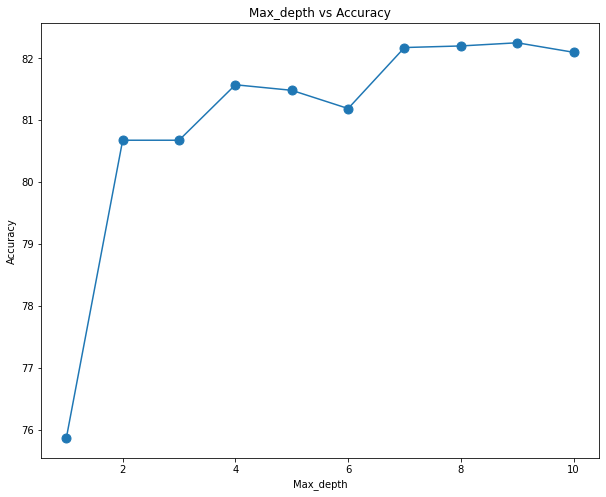

In [22]:
#(B)
#Holdout cross validation to figure out optimal value of max_Depth
acc=[]
for md in list(range(1,11)):
    prev_nodes=[]
    accuracy=0
    DT = Tree( maxLeafSize = 2, maxDepth=md  )
    DT.train( x_train, y_train )
    y_pred=[]
    for i in range(x_valid.shape[0]):
        y_pred.append(DT.predict(x_valid[i,:]))
        
    accuracy=0
    for i in range(len(y_valid)):
        if(y_pred[i]==y_valid[i]):
            accuracy+=1
        
    accuracy=(accuracy/len(y_valid))*100
    acc.append(accuracy)
    
    
plt.figure(figsize=(10,8))
plt.plot(range(1,11),acc, marker='o', markersize=9)
plt.title("Max_depth vs Accuracy")
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.show()

#Question 2(B):Maximum accuracy is around max_Depth=8 from the validation set